# **Pràctica 4: Mètode de màxima versemblança (likelihood) at work**

<hr>

**[1] Nom:**

**[1] NIU:**

**[1] mail (gmail):**

<hr>

**[2] Nom:**

**[2] NIU:**

**[2] mail (gmail):**

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr4_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr4_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr4_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr4_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

**Objectiu de la pràctica**

Vam veure a classe que la funció de versemblança ($\textit{likelihood function}$ en anglès) per a un conjunt de valors $\{x_1,...,x_n\}$ que segueixen una distribució de probabilitat $f$ que depèn d'un paràmetre $\theta$ ve definida per:

$$
L(\theta) = \prod_{i=1}^n f(x_i;\theta)
$$

Si disposem d'un conjunt de valors que sabem que segueixen una distribució determinada, podem construir el quocient de versemblança entre dos valors del paràmetre $\theta$:

$$
Q(\theta_1) = \frac{L(\theta_1)}{L(\theta_{ref})}
$$

Si $Q>1$, és intuïtiu pensar que el valor de $\theta_1$ és més probable que el valor de $\theta_{ref}$.

<font color='orange'>**> Python #1**</font>

Tenim 100 mesures que segueixen la següent distribució de Pareto:

$$
f(x;\alpha) = \frac{\alpha}{x^{\alpha+1}}, \alpha > 0, \quad x \in [1,\infty)
$$

És una distribució que depèn d'un paràmetre $\alpha$. Agafarem el valor de referència de $\alpha_{ref}$=1+(últims dos dígitis NIU)/100 i calcularem $Q$ per a un rang de valors de $\alpha$ (per exemple, si el teu NIU és 1615432, $\alpha_{ref}$=1.32 ← agafeu els numeros d'un dels NIUs si ho feu en parella). Es tracta de trobar el màxim valor de Q, que correspon a una estimació del paràmetre $\alpha_{opt}$ que s'ajusta millor a les mesures.

Les mesures són:

```
x = [2.73132969,1.21929592,2.04302258,1.49995938,1.1865351,2.32398417,1.08277556,2.80151033,1.55646876,1.62986655,1.10269442,2.98881179,
     1.08519505,1.37804267,1.01455413,1.04229347,1.27550387,1.50647462,1.35770365,1.31164913,1.84907585,1.84474957,1.68860849,4.75516076,
     1.07313229,1.08137297,1.71225823,1.1870415,2.58066787,1.17598838,1.03824839,1.03887409,1.05131455,1.58359672,1.53241354,1.10785649,
     1.57199901,1.54132259,1.04928338,1.66617945,1.18224489,1.31698078,1.11208638,1.04422619,1.42262102,1.26360848,2.27996545,1.15668472,
     2.16406287,1.12938044,1.02825654,1.5040314,1.15382534,1.00950614,1.07241586,1.15838187,1.18258782,1.61896388,3.43153026,2.18518723,
     1.00103234,1.19055495,1.20738098,1.15562534,1.38265986,1.04521684,1.04798027,1.22760926,1.0618476,2.08672498,1.19262065,1.33103947,
     1.06377739,1.41585491,1.30806538,1.30748544,1.04321192,1.38188847,1.15718462,1.05121329,1.57976311,1.19944742,2.13362692,1.15419423,
     1.74810777,1.08282923,1.00417485,1.39527086,1.1948191,1.40233872,1.01076528,1.57026398,2.9560986,1.21978924,1.01575068,1.9394421,
     1.11541329,1.19029772,1.48326718,1.03036176]
```

Defineix en aquesta secció dues funcions:

*   una funció que prengui la llista de mesures i un valor $\alpha$ concret i que retorni el valor de L($\alpha$)
*   una funció que prengui la llista de mesures, un valor $\alpha$ concret, i un valor de referència $\alpha_{ref}$ i que retorni el valor de Q($\alpha$)

Imprimeix per pantalla el valor de L per a $\alpha$=$\alpha_{ref}$, i el valor de Q($\alpha$=$\alpha_{ref}$), que evidentment ha de donar el valor de 1.

Com moltes altres distribucions, la Pareto es pot trobar a ``scipy.stats```:

```ss.pareto.rvs(b, loc=0, scale=1, size=1)```

```ss.pareto.pdf(x, b, loc=0, scale=1)```

En aquestes funcions farem servir loc=0 i scale=1. No cal passar aquests paràmetres, ja que farem servir els que prenen per defecte. En aquest cas, b=$\alpha$.

In [62]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy import stats

In [63]:
x = [2.73132969,1.21929592,2.04302258,1.49995938,1.1865351,2.32398417,1.08277556,2.80151033,1.55646876,1.62986655,1.10269442,2.98881179,
     1.08519505,1.37804267,1.01455413,1.04229347,1.27550387,1.50647462,1.35770365,1.31164913,1.84907585,1.84474957,1.68860849,4.75516076,
     1.07313229,1.08137297,1.71225823,1.1870415,2.58066787,1.17598838,1.03824839,1.03887409,1.05131455,1.58359672,1.53241354,1.10785649,
     1.57199901,1.54132259,1.04928338,1.66617945,1.18224489,1.31698078,1.11208638,1.04422619,1.42262102,1.26360848,2.27996545,1.15668472,
     2.16406287,1.12938044,1.02825654,1.5040314,1.15382534,1.00950614,1.07241586,1.15838187,1.18258782,1.61896388,3.43153026,2.18518723,
     1.00103234,1.19055495,1.20738098,1.15562534,1.38265986,1.04521684,1.04798027,1.22760926,1.0618476,2.08672498,1.19262065,1.33103947,
     1.06377739,1.41585491,1.30806538,1.30748544,1.04321192,1.38188847,1.15718462,1.05121329,1.57976311,1.19944742,2.13362692,1.15419423,
     1.74810777,1.08282923,1.00417485,1.39527086,1.1948191,1.40233872,1.01076528,1.57026398,2.9560986,1.21978924,1.01575068,1.9394421,
     1.11541329,1.19029772,1.48326718,1.03036176]

a_ref = 1+0.61

In [64]:
def likelihood (a, x):
  val_dist = ss.pareto.pdf(x, b=a, loc=0, scale=1)
  # valor de la dist en llista per totes les x i a
  L = np.prod(val_dist)
  # multiplico tots els elements de la llista
  return L

def q_likelihood (a, a_ref, x):
  Q = likelihood(a, x)/likelihood(a_ref, x)
  # crido la funcio amb els valors q minteressen
  return Q

<font color='orange'>**> Python #2**</font>

Pren 1000 valors equidistants de $\alpha$ entre 0.5 i 10, calcula els valors de Q per a cadascun d'aquests valors de $\alpha$. Fes una gràfica d'aquests valors obtinguts davant dels valors de $\alpha$ i avalua $\alpha_{opt}$, aquell que màxima Q.

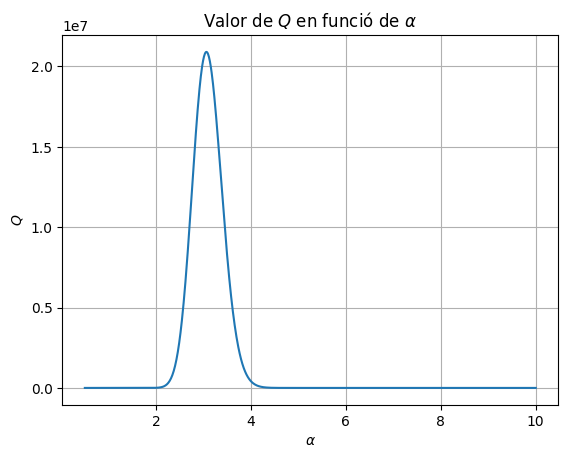

La Q és màxima per el valor de alfa_opt = 3.05805806


In [77]:
def busca_a_opt(a, Q):
  pos_q_max = np.argmax(Q)
  # posicio del valor maxim
  # [0,2,3,1] -> np.argmax() = 2 (posicio 2 pq començem al 0)
  a_opt = alfa[pos_q_max]
  # agafem el valor a de la posicio corresponent on esta Q max
  return a_opt

alfa = np.linspace(0.5, 10, 1000)

q_val = []

for a in alfa:
  q_val.append(q_likelihood(a, a_ref, x))
  # nem colocant els valors de Q per cada alfa a la llista q_val

plt.figure()
plt.plot(alfa, q_val)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$Q$")
plt.title(r"Valor de $Q$ en funció de $\alpha$")
plt.grid(True)
plt.show()

print("La Q és màxima per el valor de alfa_opt = " + f"{busca_a_opt(alfa, q_val):.8f}")
alfa_opt = busca_a_opt(alfa, q_val)

### <font color='green'>**> ENTREGA**</font>

1) També podem utilitzar la funció log-likelihood per trobar el valor de $\alpha_{mle}$, és a dir aquell valor que maximitza la funció de log-likelihood.

Implementa la funció que calcula $l = ln(L)$ (log-likelihood) en funció de $\alpha$, per al rang de valors de $\alpha$ considerats a l'apartat anterior. Fes una gràfica dels valors de $l$ en funció de $\alpha$ i avalua quin és el $\alpha_{òptim} \equiv \alpha_{mle}$ (aquell que maximitza la funció $l$).

Recorda que per a cada $\alpha_i$ al rang es calcula $l_i$ com:

$$
l_i = ln(L_i) = \sum_{n=1}^{N} ln f(x_n, \alpha_i)
$$

Imprimeix per pantalla el valor que trobes de $\alpha_{mle}$... que hauria de ser un valor molt semblant al que has trobat anteriorment!

**[4 punts]**


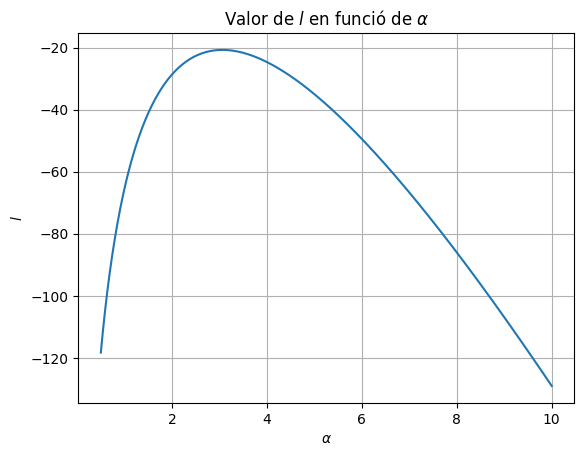

La l és màxima per el valor de alfa_mle = 3.05805806


In [78]:
def loglikelihood (a, x):
  val_dist = ss.pareto.pdf(x, b=a, loc=0, scale=1)
  # valor de la dist en llista per totes les x i a
  l = np.sum(np.log(val_dist))
  # sumo tots els elements de la llista (que ja els hi ha fet el log)
  return l

l_val = []

for a in alfa:
  l_val.append(loglikelihood(a, x))
# nem colocant els valors de l per cada alfa a la llista l_val

plt.figure()
plt.plot(alfa, l_val)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$l$")
plt.title(r"Valor de $l$ en funció de $\alpha$")
plt.grid(True)
plt.show()

print("La l és màxima per el valor de alfa_mle = " + f"{alfa[np.argmax(l_val)]:.8f}")
alfa_mle = alfa[np.argmax(l_val)]
# posicio del valor de l max
# agafem la alfa corresponent a la posicio

2) El valor esperat $E[x]$ d'aquesta funció de Pareto és:

$$
  E(x)=\frac{\alpha}{\alpha-1}
$$

Calcula el valor mitjà del conjunt de 100 valors proporcionats, i compara aquest valors amb $E[x]$ evaluat amb els valors de $\alpha$ que has trobat als apartats anteriors, imprimint els valors per pantalla.

**[1.5 punts]**

In [79]:
print("El valor mitjà del conjunt de x és " + f"{np.median(x)}")
print("L'esperança amb alfa_opt és " + f"{alfa_opt/(alfa_opt-1)}")
print("L'esperança amb alfa_mle és " + f"{alfa_mle/(alfa_mle-1)}")

El valor mitjà del conjunt de x és 1.2236992500000001
L'esperança amb alfa_opt és 1.4858949416342413
L'esperança amb alfa_mle és 1.4858949416342413


3) Fes un histograma normalitzat de les mesures i afegeix la pdf de la funció de Pareto, prenent el valor de $\alpha_{mle}$ com a valor òptim. Fes la gràfica entre [0,10] en x, i posa l'eix $y$ en log-scale.

**[1.5 punts]**

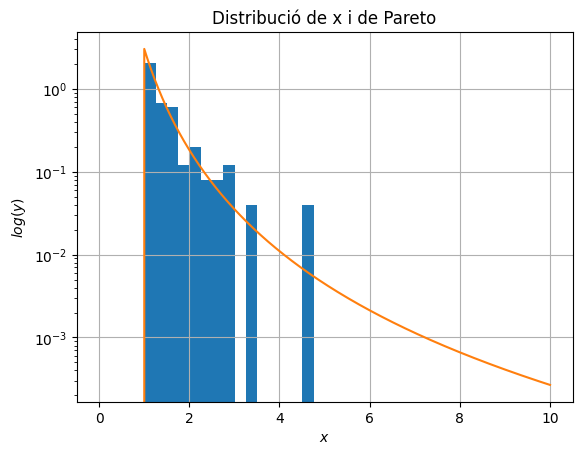

In [68]:
plt.hist(x, bins=15, density=True)
plt.plot(np.linspace(0, 10, 1000), ss.pareto.pdf(np.linspace(0, 10, 1000), b=alfa_mle, loc=0, scale=1))
plt.yscale('log')
plt.title("Distribució de x i de Pareto")
plt.xlabel(r"$x$")
plt.ylabel(r"$log(y)$")
plt.grid(True)
plt.show()

4) De la'apartat 3 no es veu gaire clar si la cua de la distribució és correcte o no, o el valor que hem trobat és correcte... Genera al 10^6 valors que segueixin una distribució de Pareto amb un valor de $\alpha_{mle}$, i fes l'histograma d'aquests valors i afegeix la pdf de la distribució a la mateixa gràfica. Fes la gràfica entre [0,10] en x, i posa l'eix $y$ en log-scale.

Ara si que es veu millor (que ho hem fet bé!). :)

Truc:

1.   Pots fer servir el mètode de transformació amb $x = u^{-1/\alpha_{mle}}$.
2.   Pots fer servir el mètode MC, generant valors aleatoris en $x \in [1,10]$ i $y \in [0,4]$. Aquesta àrea és 36 (unitats arbitràries), i la integral de la funció de pareto entre 1 i 10 és de $(10^{\alpha_{mle}}-1)/10^{\alpha_{mle}}$, que es pot aproximar a 1...


**[3 punts]**

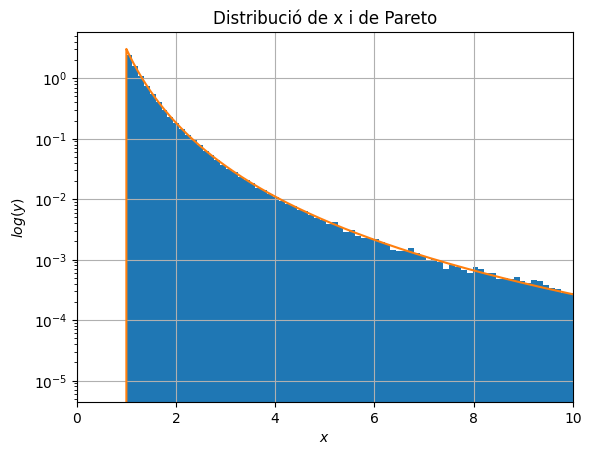

In [69]:
N = 1000000
u = stats.uniform.rvs(loc=0, scale=1, size=N)
x_trans = u**(-1/alfa_mle)

plt.hist(x_trans, bins=int(np.sqrt(N)), density=True)
plt.plot(np.linspace(0, 10, N), ss.pareto.pdf(np.linspace(0, 10, N), b=alfa_mle, loc=0, scale=1))
plt.yscale('log')
plt.title("Distribució de x i de Pareto")
plt.xlabel(r"$x$")
plt.ylabel(r"$log(y)$")
plt.grid(True)
plt.xlim(0,10)
plt.show()

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr4_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr4_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr4_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr4_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>